In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/kaggle/input/student-graduation-dataset/graduation_dataset.csv")

In [4]:
data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [5]:
labels = data["Target"]

In [6]:
from tqdm import tqdm
tqdm.pandas()

In [7]:
labels.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [8]:
num_labels = labels

def integ(x):
    if x == "Dropout":
        return 0
    if x == "Graduate":
        return 1
    if x == "Enrolled":
        return 2

tokenized_data = num_labels.progress_apply(lambda x: integ(x))

#tokenized_data = tokenized_data[tokenized_data.str.len() >= context_length+1]

#tokenized_data = tokenized_data.reset_index(drop=True)


tokenized_data.value_counts()


100%|██████████| 4424/4424 [00:00<00:00, 316599.85it/s]


Target
1    2209
0    1421
2     794
Name: count, dtype: int64

In [9]:
features = data

features = features.drop("Target", axis=1)

features = np.array(features)

In [10]:
cat_labels = np.array(tokenized_data)

In [11]:
print(features)
print(cat_labels)

[[ 1.    8.    5.   ... 10.8   1.4   1.74]
 [ 1.    6.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    5.   ... 10.8   1.4   1.74]
 ...
 [ 1.    1.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    1.   ...  9.4  -0.8  -3.12]
 [ 1.    5.    1.   ... 12.7   3.7  -1.7 ]]
[0 1 0 ... 0 1 1]


In [12]:
input_layer = tf.keras.layers.Input(shape=features.shape[1:])

dense1 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
dense2 = tf.keras.layers.Dense(128, activation="relu")(dense1)
dense3 = tf.keras.layers.Dense(128, activation="relu")(dense2)

dense_out=tf.keras.layers.Dense(3,activation="softmax")(dense3)

model=tf.keras.Model(inputs=[input_layer],outputs=[dense_out])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense (Dense)               (None, 128)               4480      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 37891 (148.01 KB)
Trainable params: 37891 (148.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:

optim = tf.keras.optimizers.Lion()
#optim = tf.keras.optimizers.Adam()

loss = tf.keras.losses.sparse_categorical_crossentropy

metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [14]:
print(features[1])
print(cat_labels[1])

[ 1.          6.          1.         11.          1.          1.
  1.          1.          3.          4.          4.          1.
  0.          0.          0.          1.          0.         19.
  0.          0.          6.          6.          6.         14.
  0.          0.          6.          6.          6.         13.66666667
  0.         13.9        -0.3         0.79      ]
1


In [15]:
callbacks = tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

model.fit(features, cat_labels, validation_split=0.2, epochs=100, callbacks=callbacks)

Epoch 1/100
111/111 [==============================] - 1s 6ms/step - loss: 1.2292 - sparse_categorical_accuracy: 0.5606 - val_loss: 0.7807 - val_sparse_categorical_accuracy: 0.6633
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.7038 - sparse_categorical_accuracy: 0.7087 - val_loss: 0.6984 - val_sparse_categorical_accuracy: 0.7073
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.6391 - sparse_categorical_accuracy: 0.7310 - val_loss: 0.6525 - val_sparse_categorical_accuracy: 0.7175
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.6089 - sparse_categorical_accuracy: 0.7434 - val_loss: 0.6446 - val_sparse_categorical_accuracy: 0.7333
Epoch 5/100
111/111 [==============================] - 0s 4ms/step - loss: 0.5818 - sparse_categorical_accuracy: 0.7593 - val_loss: 0.6207 - val_sparse_categorical_accuracy: 0.7345
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.5614 - sparse_cate

In [16]:
list_of_numbers = np.random.randint(0,len(features),size=(50))
for number in list_of_numbers:
    prediction = model.predict(np.expand_dims(features[number], axis=0), verbose=0)
    prediction = np.argmax(prediction)

    def integr(x):
        if x == 0:
            return "Dropout"
        if x == 1:
            return "Graduated"
        if x == 2:
            return "Enrolled"

    
    
    if integr(prediction) != integr(cat_labels[number]):
        print(f"predicted: {integr(prediction)}")
        print(f"actual: {integr(cat_labels[number])}")
        print(features[number])
        print("\n\n\n")

predicted: Dropout
actual: Enrolled
[ 1.   15.    1.    8.    1.   14.    1.   13.   14.    6.    6.    1.
  0.    1.    0.    0.    0.   20.    0.    1.    6.   11.    3.   12.
  0.    0.    6.   11.    2.   11.    0.   12.4   0.5   1.79]




predicted: Dropout
actual: Enrolled
[ 1.    8.    1.   14.    1.    1.    1.    1.    1.    5.    5.    0.
  0.    0.    1.    1.    0.   19.    0.    0.    5.   10.    0.    0.
  0.    0.    5.    5.    0.    0.    0.    7.6   2.6   0.32]




predicted: Enrolled
actual: Dropout
[ 1.    1.    1.    8.    1.    1.    1.    1.    1.   10.   10.    0.
  0.    0.    0.    1.    0.   18.    0.    0.    6.    8.    5.   11.6
  0.    0.    6.   11.    4.   13.    0.    8.9   1.4   3.51]




predicted: Graduated
actual: Enrolled
[ 1.          1.          1.          3.          0.          1.
  1.          3.          1.          3.         10.          1.
  0.          0.          1.          1.          0.         26.
  0.          0.          6.      

In [17]:
list_of_numbers = np.random.randint(0,len(features),size=(50))

for number in list_of_numbers:
    prediction = model.predict(np.expand_dims(features[number], axis=0), verbose=0)
    prediction = np.argmax(prediction)

    def integr(x):
        if x == 0:
            return "Dropout"
        if x == 1:
            return "Graduated"
        if x == 2:
            return "Enrolled"

    
    
    if integr(prediction) == "Dropout" and integr(cat_labels[number]) == "Enrolled":
        print(f"predicted: {integr(prediction)}")
        print(f"actual: {integr(cat_labels[number])}")
        print(features[number])
        print("\n\n\n")

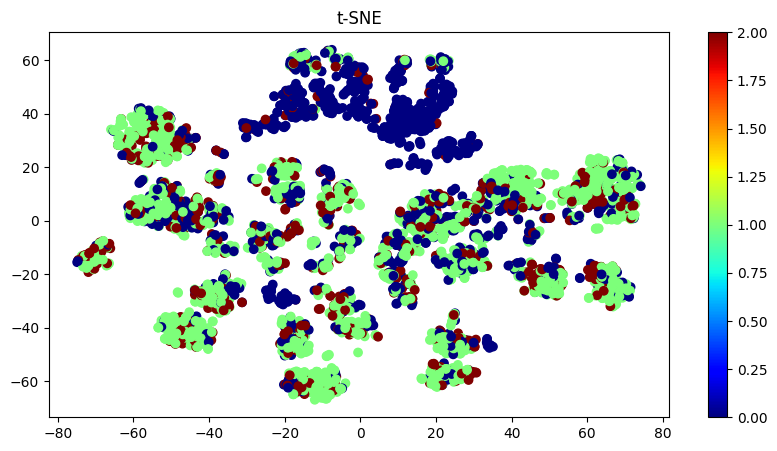

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
reduced_features_tsne = tsne.fit_transform(features)

plt.figure(figsize=(10, 5))
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:, 1], c=cat_labels, cmap='jet')
plt.title("t-SNE")
plt.colorbar()
plt.show()
